# Text Analysis Notebook

This notebook performs a comprehensive text analysis on a government program PDF. The analysis includes PDF processing, token statistics, part-of-speech and named entity analyses, word cloud generation, keyword extraction, entity network visualization, document structure analysis, and more.

In [2]:
# Import necessary libraries
import os
import re
import spacy
from spacy_layout import spaCyLayout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdfplumber as pdf
from collections import Counter
from wordcloud import WordCloud
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Set visualization style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## 1.0 Setup 

In [ ]:
%%bash
python -m spacy download de_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━�0m�0m�━ 0.0/567.8 MB ? eta -:--:--��━━━━━━━━━━━ 0.3/567.8 MB ? eta -:--:--��━━━━━━━━━━━ 0.8/567.8 MB 2.7 MB/s eta 0:03:31��━━━━━━━━━━━ 1.8/567.8 MB 3.3 MB/s eta 0:02:51��━━━━━━━━━━━ 2.9/567.8 MB 3.7 MB/s eta 0:02:34��━━━━━━━━━━━ 3.4/567.8 MB 3.6 MB/s eta 0:02:39��━━━━━━━━━━━ 4.7/567.8 MB 4.0 MB/s eta 0:02:22��━━━━━━━━━━━ 5.5/567.8 MB 4.0 MB/s eta 0:02:22��━━━━━━━━━━━ 6.3/567.8 MB 4.0 MB/s eta 0:02:20��━━━━━━━━━━━━━━ 7.3/567.8 MB 4.1 MB/s eta 0:02:17��━━━━━━━━━━━━━━ 8.1/567.8 MB 4.0 MB/s eta 0:02:19��━━━━━━━━━━━━━━ 9.2/567.8 MB 4.2 MB/s eta 0:02:14��━━━━━━━━━━━━━━ 10.2/567.8 MB 4.3 MB/s eta 0:02:11��━━━━━━━━━━━━━━ 11.0/567.8 MB 4.2 MB/s eta 0:02:12��━━━━━━━━━━━━━━ 12.1/567.8 MB 4.3 MB/s eta 0:02:10��━━━━━━━━━━━━━━ 13.1/567.8 MB 4.3 MB/s eta 0:02:09��━━━━━━━━━━━━━━ 14.2/567.8 MB 4.5 MB/s eta 0:02:04��━━━━━━━━━━━━━━━━━ 15.5/567.8 MB 4.5 MB/s eta 0:02:02��━━━━━━━━━━━━━━━━━ 16.3/567.8 MB 4.5 MB/s eta 0:02:02��━━━━━━━━━━━━━━━━━ 17.3/567.8 MB 4.5 MB/s eta 0:0

## 1.1 Load German Language Model

In [4]:
# Load the German language model
print("Loading German language model...")
nlp = spacy.load("de_core_news_lg")
nlp.add_pipe('sentencizer')

# Import spaCyLayout for PDF processing
layout = spaCyLayout(nlp)

Loading German language model...


### 1.2 PDF Processing

In [ ]:
# Function to process PDF file using spacy-layout
def process_pdf_with_spacy(pdf_path):
    print(f"Processing PDF file with spacy: {pdf_path}")
    try:
        # Process the PDF directly with spaCyLayout
        doc = layout(pdf_path)
        return doc
    except Exception as e:
        print(f"Error processing PDF: {e}")
        return None

def process_pdf_with_plumber(pdf_path):
    print(f"Processing PDF file with pdfplumber: {pdf_path}")

    all_text = ""
    try:
        with pdf.open(pdf_path) as pdf:
            for page in pdf.pages:
                text = page.extract_text()
                if text:
                    all_text += text + "\n"
        # Clean up text
        all_text = re.sub(r'\n+', ' ', re.sub(r'\s+', ' ', all_text))

        return all_text

    except Exception as e:
        print(f"Error extracting text from PDF: {e}")
        return None


# Path to the government program PDF
pdf_path = "../data/02_text-analysis/Regierungsprogramm_2025.pdf"

# Process the PDF
doc = nlp(process_pdf_with_spacy(pdf_path) or process_pdf_with_plumber(pdf_path))


Processing PDF file with spacy: ../data/02_text-analysis/Regierungsprogramm_2025.pdf


### 1.3 Document Statistics

In [6]:
# Print basic statistics about the document
print(f"\n📊 Document Statistics:")
print(f"Total tokens: {len(doc)}")
print(f"Total sentences: {len(list(doc.sents))}")
print(f"Unique words: {len(set([token.text.lower() for token in doc if token.is_alpha]))}")

# Create a sample preview of the text
preview_length = 300
text_preview = doc.text[:preview_length] + "..." if len(doc.text) > preview_length else doc.text
print(f"\nText preview: {text_preview}")


📊 Document Statistics:
Total tokens: 74656
Total sentences: 5049
Unique words: 11384

Text preview: Regierungsprogramm 2025-2029

INHALTSVERZEICHNIS

TABLE

TABLE

TABLE

JETZT DAS RICHTIGE TUN. FÜR ÖSTERREICH.

In  Zeiten  großer  Herausforderungen  hat  Österreich  seine  Stärke  stets  aus  dem Konsens der konstruktiven Kräfte gewonnen. In den entscheidenden Momenten der Geschichte unseres Land...


### 1.4 Part-of-Speech Analysis


Analyzing parts of speech...


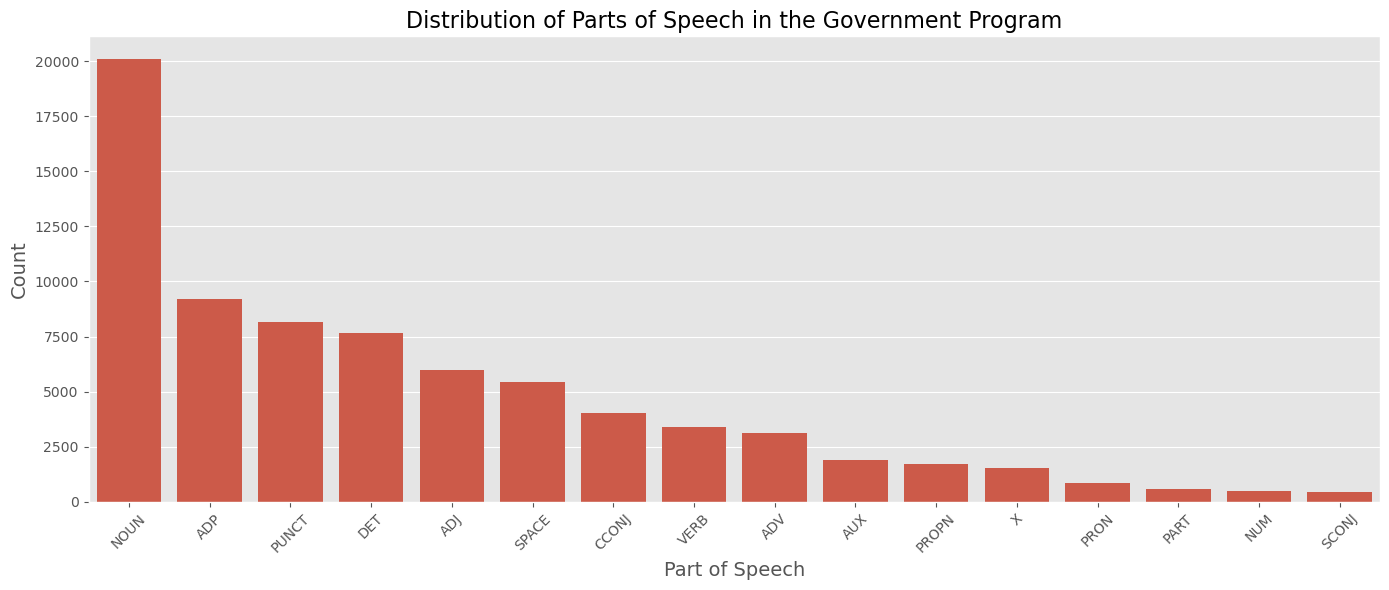

In [7]:
print("\nAnalyzing parts of speech...")
pos_counts = Counter([token.pos_ for token in doc])
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count'])
pos_df = pos_df.sort_values('Count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x='POS', y='Count', data=pos_df)
plt.title('Distribution of Parts of Speech in the Government Program', fontsize=16)
plt.xlabel('Part of Speech', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Named Entity Recognition


Analyzing named entities...


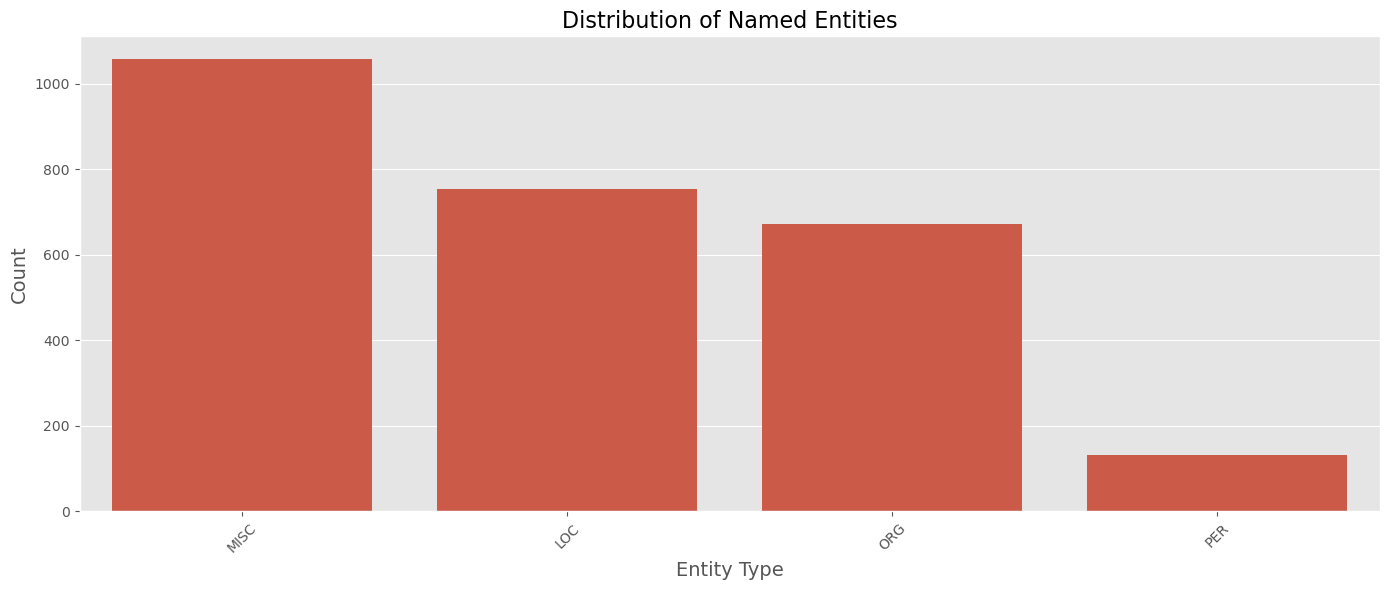


🏷️ Sample Named Entities:
Bundesministerium für Wirtschaft, Energie und Tourismus

Sozialdemokratische Partei Österreichs - ORG (Organization)
Bundesministerium für Landesverteidigung

 Bundesministerium für Wirtschaft, Energie - ORG (Organization)
Die Transparenz für Konsumentinnen und Konsumenten bei Regionalität und Qualität - MISC (Miscellaneous)
Bundesministerium für europäische und internationale Angelegenheiten

UMSETZUNG - ORG (Organization)
Dienstbeurteilungen für Richterinnen und Richter und Staatsanwältinnen - MISC (Miscellaneous)
Bundesministerium für europäische und internationale Angelegenheiten - ORG (Organization)
NETZE

Leistbare Energiepreise

 Modernes Elektrizitätsrecht - ORG (Organization)
Staatlichen Krisen- und KatastrophenschutzmanagementStrategie - ORG (Organization)
Die Deradikalisierungsmaßnahmen und die Extremismusprävention - MISC (Miscellaneous)
Bundesagentur für Betreuungs- und Unterstützungsleistungen - ORG (Organization)
Bundesministerium für Frauen,

In [20]:
print("\nAnalyzing named entities...")
# Filter out single words and common false positives
filtered_entities = [
    ent for ent in doc.ents
    if len(ent.text.strip()) > 3 and not ent.text.strip() in ["DAS", "FÜR", "INHALTSVERZEICHNIS"]
]

entity_counts = Counter([ent.label_ for ent in filtered_entities])
entity_df = pd.DataFrame(entity_counts.items(), columns=['Entity Type', 'Count'])
entity_df = entity_df.sort_values('Count', ascending=False)

# Add entity type descriptions - expanded to include all German model entity types
entity_descriptions = {
    'LOC': 'Location',
    'ORG': 'Organization',
    'PER': 'Person',
    'MISC': 'Miscellaneous',
    'DATE': 'Date',
    'CARDINAL': 'Cardinal Number',
    'MONEY': 'Monetary Value',
    'GPE': 'Geopolitical Entity',
    'ORDINAL': 'Ordinal Number',
    'QUANTITY': 'Quantity',
    'TIME': 'Time',
    'PERCENT': 'Percentage',
    'WORK_OF_ART': 'Work of Art',
    'LAW': 'Law',
    'LANGUAGE': 'Language',
    'EVENT': 'Event',
    'FAC': 'Facility',
    'PRODUCT': 'Product',
    'NORP': 'Nationality or Religious or Political Group',
    # Specific German entities
    'ART': 'Article',
    'DOCS': 'Document',
    'PRS': 'Person Specification',
    'SOC': 'Social Entity'
}

# Create a new column with descriptions where available
entity_df['Description'] = entity_df['Entity Type'].map(lambda x: entity_descriptions.get(x, x))

# Print entity types without descriptions to help identify missing ones
missing_descriptions = [ent for ent in entity_df['Entity Type'].unique() if ent not in entity_descriptions]
if missing_descriptions:
    print("\nEntity types without descriptions:")
    print(missing_descriptions)

# Visualization
plt.figure(figsize=(14, 6))
sns.barplot(x='Entity Type', y='Count', data=entity_df)
plt.title('Distribution of Named Entities', fontsize=16)
plt.xlabel('Entity Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n🏷️ Sample Named Entities:")
for i, ent in enumerate(sorted(filtered_entities, key=lambda x: len(x.text), reverse=True)[:15]):
    desc = entity_descriptions.get(ent.label_, ent.label_)
    print(f"{ent.text} - {ent.label_} ({desc})")

## Word Cloud Generation


Generating word cloud...


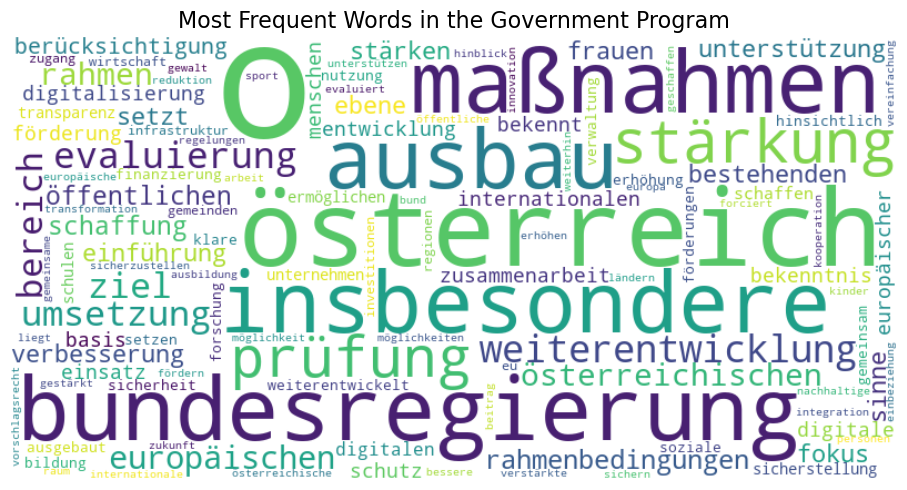

In [ ]:
print("\nGenerating word cloud...")

def generate_wordcloud(text, title='Word Cloud', stopwords=None):
    # Filter out stopwords and punctuation
    if stopwords is None:
        stopwords = []

    # Create and generate a word cloud image
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords,
        min_font_size=10,
        max_font_size=150,
        collocations=False,
        random_state=42
    ).generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Create a list of tokens excluding stopwords and punctuation
filtered_tokens = [token.text.lower() for token in doc
                  if not token.is_stop and not token.is_punct and token.is_alpha]
filtered_text = " ".join(filtered_tokens)

# Generate word cloud
generate_wordcloud(filtered_text, title='Most Frequent Words in the Government Program')

## Most Common Nouns Analysis


Analyzing most common nouns...


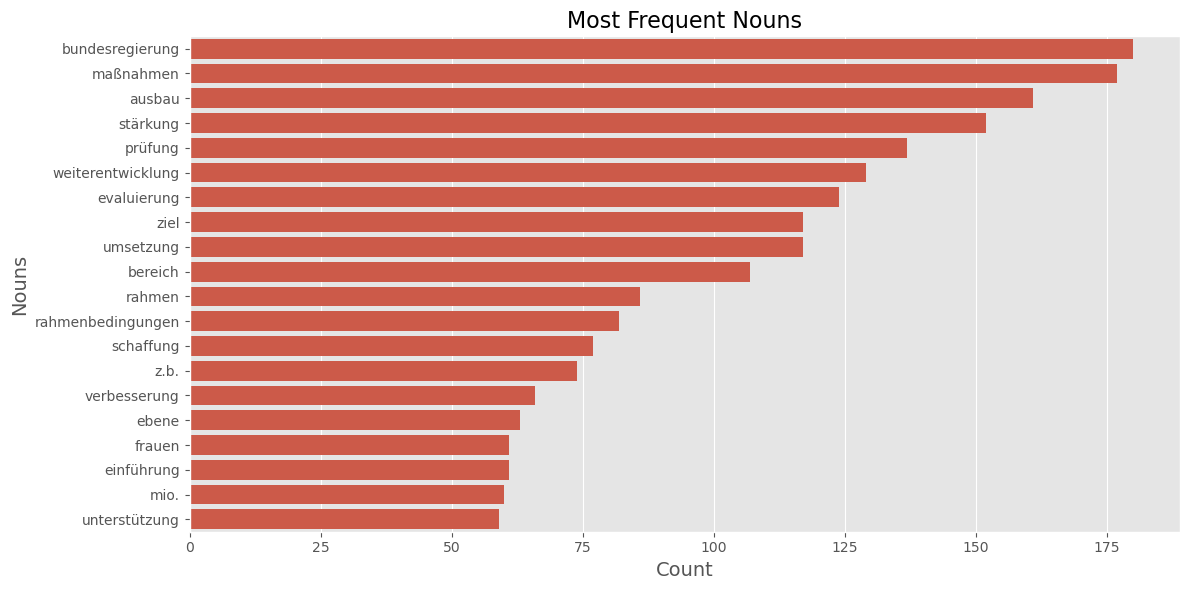

In [10]:
print("\nAnalyzing most common nouns...")
nouns = [token.text.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_stop]
noun_counts = Counter(nouns).most_common(20)
noun_df = pd.DataFrame(noun_counts, columns=['Noun', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Noun', data=noun_df)
plt.title('Most Frequent Nouns', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Nouns', fontsize=14)
plt.tight_layout()
plt.show()

## Most Common Adjectives Analysis


Analyzing most common adjectives...


/var/folders/rz/q6x0q6d95wgbtn0lvy7_wcb00000gq/T/ipykernel_3784/1065056137.py:11: UserWarning: Glyph 61607 (\uf0a7) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniconda/base/envs/djpyworkshop/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 61607 (\uf0a7) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


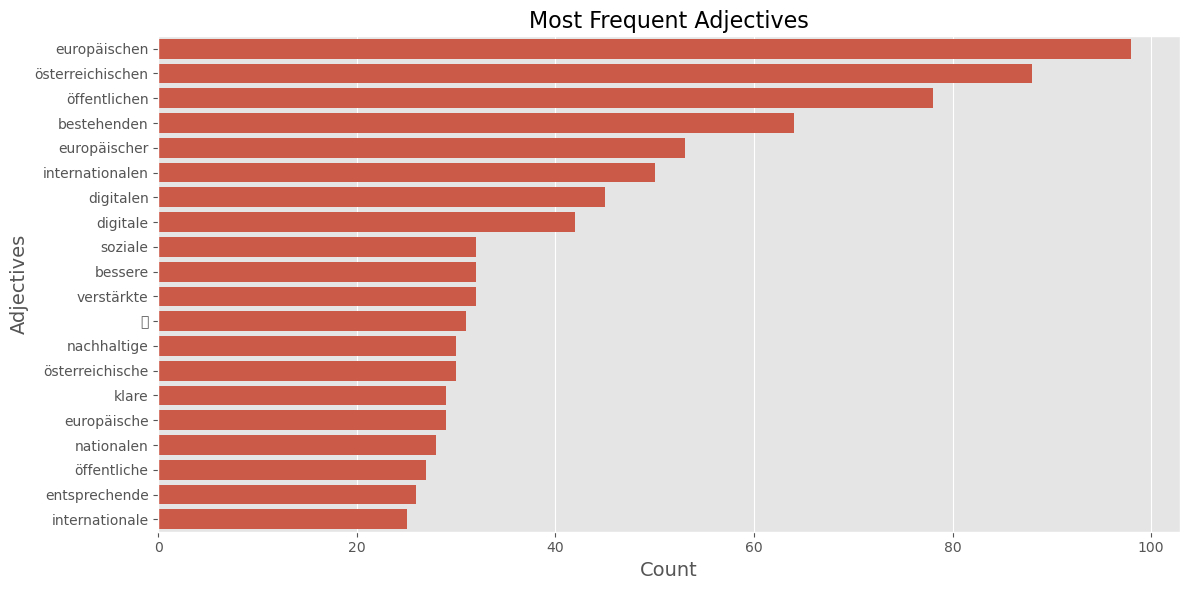

In [11]:
print("\nAnalyzing most common adjectives...")
adjectives = [token.text.lower() for token in doc if token.pos_ == 'ADJ' and not token.is_stop]
adj_counts = Counter(adjectives).most_common(20)
adj_df = pd.DataFrame(adj_counts, columns=['Adjective', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Adjective', data=adj_df)
plt.title('Most Frequent Adjectives', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Adjectives', fontsize=14)
plt.tight_layout()
plt.show()

## Sentence Length Analysis

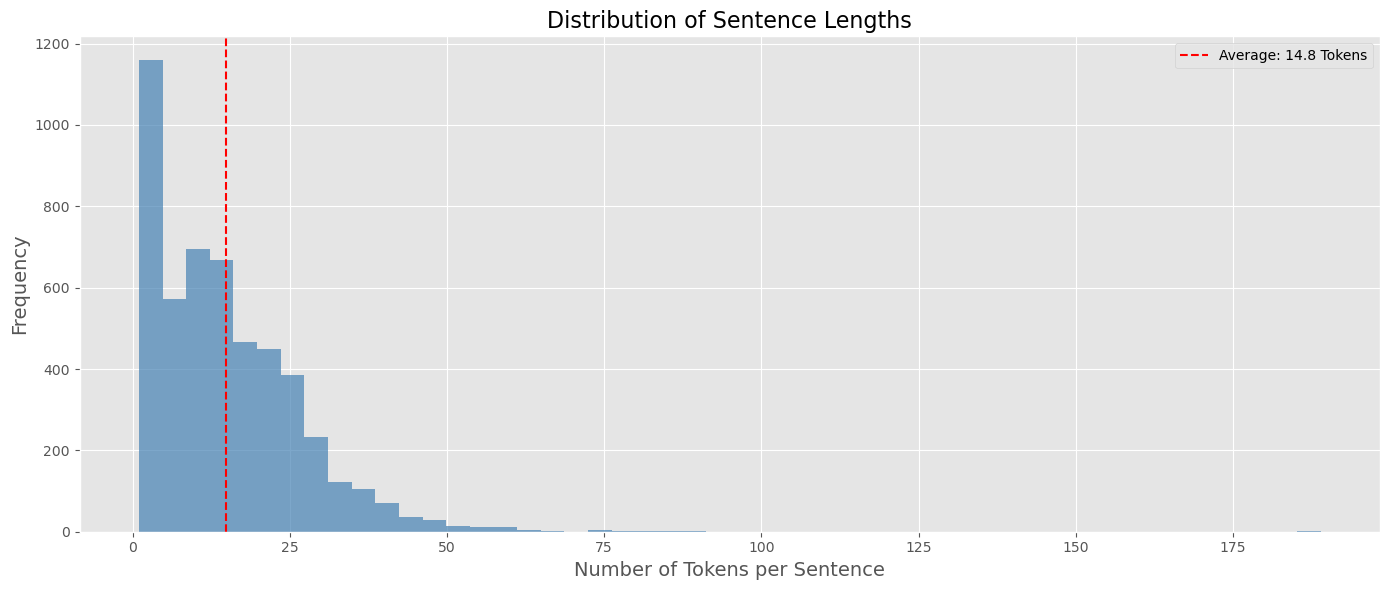

In [ ]:
sentence_lengths = [len(sent) for sent in doc.sents]

plt.figure(figsize=(14, 6))
plt.hist(sentence_lengths, bins=50, alpha=0.7, color='steelblue')
plt.axvline(x=np.mean(sentence_lengths), color='red', linestyle='--',
            label=f'Average: {np.mean(sentence_lengths):.1f} Tokens')
plt.title('Distribution of Sentence Lengths', fontsize=16)
plt.xlabel('Number of Tokens per Sentence', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## Summary of Analysis

In [18]:
print("\n=== Summary of Text Analysis ===")
print(f"Document Length: {len(doc)} Tokens")
print(f"Unique Words: {len(set([token.text.lower() for token in doc if token.is_alpha]))}")
print(f"Number of Sentences: {len(list(doc.sents))}")
print(f"Average Sentence Length: {np.mean(sentence_lengths):.1f} Tokens")
print(f"Named Entities Found: {len(doc.ents)}")
if len(entity_df) > 0:
    print(f"Most Common Entity Type: {entity_df.iloc[0]['Entity Type']} ({entity_df.iloc[0]['Count']} occurrences)")
if len(noun_df) > 0:
    print(f"Most Frequent Noun: {noun_df.iloc[0]['Noun']} ({noun_df.iloc[0]['Count']} occurrences)")


=== Summary of Text Analysis ===
Document Length: 74656 Tokens
Unique Words: 11384
Number of Sentences: 5049
Average Sentence Length: 14.8 Tokens
Named Entities Found: 2905
Most Common Entity Type: MISC (1058 occurrences)
Most Frequent Noun: bundesregierung (180 occurrences)
